In [1]:
using Cubature

In [2]:
function Q(n::Int64, r2::Float64, r1::Float64)
    if n % 2 != 0
        0
    else
        function summand(k)
            (-1)^k * factorial(big(n-k))/(factorial(big(k))*factorial(big(Int(n/2 - k)))*factorial(big(Int(n/2 - k))))*((r2)^(n-2*k + 1)-(r1)^(n-2*k + 1))/(n-2*k+1)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n)/2), step=1)))
    end
        end

Q (generic function with 1 method)

In [3]:
using Memoize
@memoize Dict function zernike_radial_integral(r, n, m)
    if n == m
        radial = r^(n+1)/n
    elseif n - m == 2
        radial = n*zernike_radial_integral(r,n,n)-(n-1)*zernike_radial_integral(r,n-2,n-2)
    else
        H3 = (-4*((m+4)-2)*((m+4)-3)) / ((n+(m+4)-2)*(n-(m+4)+4))
        H2 = (H3*(n+(m+4))*(n-(m+4)+2)) / (4*((m+4)-1))  +  ((m+4)-2)
        H1 = ((m+4)*((m+4)-1) / 2)  -  (m+4)*H2  +  (H3*(n+(m+4)+2)*(n-(m+4))) / (8)
        radial = H1*zernike_radial_integral(r,n,m+4) + (H2+H3 / r^2)*zernike_radial(r,n,m+2)
    end
    radial
end


zernike_radial_integral (generic function with 1 method)

In [4]:
using Cubature
function neumann(m)
    if m == 0
        2
    else 
        1
    end
end
function annulus(ρ, r2, r1)
    if r2 > ρ > r1
        1
    else
        0
    end
end
function integrand(n, m, r2, r1)
    function rtn(coor)
        ρ = coor[1]
        θ = coor[2]
        zernike_radial(ρ, n, m) * ρ * annulus(ρ, r2, r1)
    end
    rtn
end
function cond_eval(n, m, r2, r1)
    if (n - m) % 2 != 0
        return 0
    elseif -n ≤ m ≤ n
        (2*n+2)/(π*neumann(m)) * hcubature(integrand(n, m, r2, r1), [0., 0.], [1., 2*π], maxevals=10000)[1]
    else
        0
    end
end

cond_eval (generic function with 1 method)

In [72]:
maxn=50
r2 = .7
r1 = .3
step = 1
plot([cond_eval(n, 0, r2, r1) for n in Array(range(0, maxn, step=step))])

LoadError: UndefRefError: access to undefined reference

In [42]:
function how_many(r2, r1)
    if r2 < r1
        0
    else
        last_breaker = 0
        lim = .01 # .01^2 is too small, .01 seems good.
        n = 0
        thresh = 10
        while n-last_breaker < thresh
            if abs(cond_eval(n, 0, r2, r1)) > lim
                last_breaker = n
            end
            n += 1
        end
        return last_breaker
    end
end

how_many (generic function with 1 method)

In [43]:
using Plots
gr()
step = .1
data = hcat([[how_many(r1, r2) for r1 in range(0, 1, step=step)] for r2 in range(0, 1, step=step)]...)

LoadError: InterruptException:

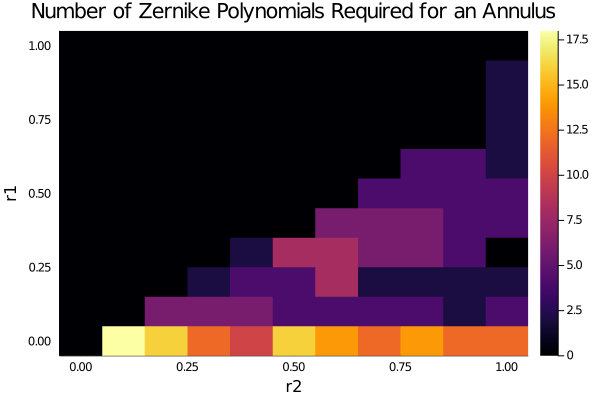

In [4]:
heatmap(range(0, 1, step=step),range(0, 1, step=step), data, xlabel="r2", ylabel="r1", title="Number of Zernike Polynomials Required for an Annulus")

In [12]:
using Plots
plot((coeffs1 + reverse(coeffs2))[1:end])

LoadError: UndefVarError: coeffs2 not defined

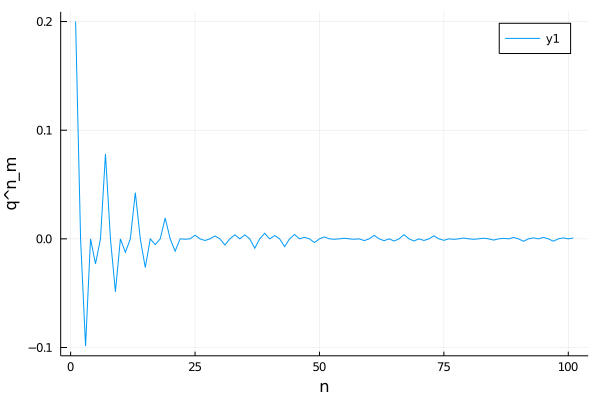

In [193]:
qs = [0.2, 0., -0.0986667, 0., -0.022976, 0., 0.0781806, 0., -0.0487342, 
0., -0.01236, 0., 0.0425507, 0., -0.0263967, 0., -0.00532531, 0., 
0.0191911, 0., -0.0113529, 0., -0.000319994, 0., 0.00334532, 0., 
-0.00150927, 0., 0.00266453, 0., -0.00564976, 0., 0.00371128, 0., 
0.00365755, 0., -0.00861338, 0., 0.00514161, 0., 0.0030191, 0., 
-0.00715006, 0., 0.00403216, 0., 0.0014179, 0., -0.00338915, 0., 
0.00178983, 0., -0.000352217, 0., 0.000572278, 0., -0.000370555, 0., 
-0.00161038, 0., 0.00320668, 0., -0.00168678, 0., -0.00198314, 0., 
0.00386709, 0., -0.00193623, 0., -0.00148342, 0., 0.00278418, 0., 
-0.00134546, 0., -0.000450159, 0., 0.000785755, 0., -0.000382714, 0., 
0.000621396, 0., -0.00113039, 0., 0.000475921, 0., 0.00128836, 0., 
-0.00220249, 0., 0.000922589, 0., 0.0013266, 0., -0.00215031, 0., 
0.000888539, 0., 0.000794939]
plot(qs, xlabel="n", ylabel="q^n_m")

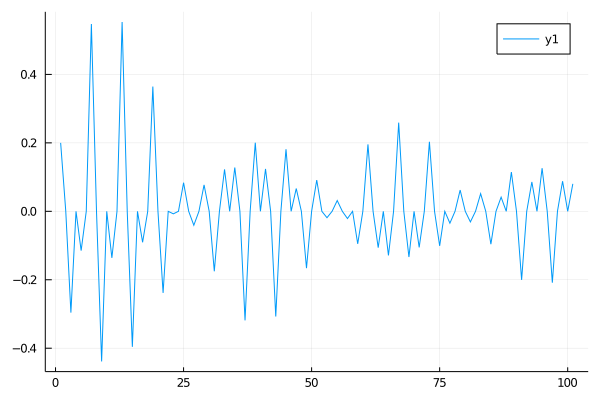

In [182]:
coefficients = [0.4, 0., -0.592, 0., -0.22976, 0., 1.09453, 0., -0.877215, 0., 
-0.27192, 0., 1.10632, 0., -0.791902, 0., -0.181061, 0., 0.72926, 0., 
-0.476823, 0., -0.0147197, 0., 0.167266, 0., -0.0815007, 0., 
0.154543, 0., -0.350285, 0., 0.244945, 0., 0.256028, 0., -0.63739, 
0., 0.401046, 0., 0.247566, 0., -0.614905, 0., 0.362894, 0., 
0.133283, 0., -0.332136, 0., 0.182562, 0., -0.037335, 0., 0.0629506, 
0., -0.0422433, 0., -0.190025, 0., 0.391215, 0., -0.212534, 0., 
-0.257808, 0., 0.51819, 0., -0.267199, 0., -0.210646, 0., 0.40649, 
0., -0.20182, 0., -0.0693245, 0., 0.124149, 0., -0.0619997, 0., 
0.103152, 0., -0.192166, 0., 0.0828102, 0., 0.229327, 0., -0.400853, 
0., 0.171602, 0., 0.252055, 0., -0.417161, 0., 0.175931, 0., 0.160578]/2
plot(coefficients)

In [176]:
using SpecialFunctions
using QuantumOptics

function fidelity(ρ, σ)
    tr(sqrt(sqrt(ρ) * σ * sqrt(ρ)))^(1/2)
end

function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function sample_across_unit_disk(f, discretization)
    x = y = Array(range(-1, 1, length=discretization))
    z = Array{typeof(f(0.,0.))}(UndefInitializer(), length(x), length(y))
    for (i, xx) in enumerate(x)
        for (j, yy) in enumerate(y)
            if xx^2 + yy^2 > 1
                if typeof(f(0.,0.)) == Tuple{Float64,Float64}
                    z[i, j] = (0.,0.)
                else
                    z[i, j] = 0.
                end
            else
                ρ = sqrt(xx^2 + yy^2)
                ϕ = atan(yy, xx)
                res = f(ρ, ϕ)
                z[i, j] = res
            end
        end
    end
    x, y, z
end


function R(n::Int64, m::Int64, ρ::Float64)
    if (n - m) % 2 != 0
        0
    else
        function summand(k)
            n = big(n)
            k = big(k)
            (-1)^k * factorial(n-k)/(factorial(k)*factorial(Int((n+m)/2) - k)*factorial(Int((n-m)/2) - k))*(ρ)^(n-2*k)
        end
        mapreduce(summand, +, Array(range(0, stop=Int((n-m)/2), step=1)))
    end
end

function Z(n, m, ρ, θ)
    if m < 0
        R(n, abs(m), ρ) * sin(abs(m) * θ)
    else
        R(n, m, ρ) * cos(m * θ)
    end
end


Z (generic function with 1 method)

In [177]:
max_n = length(coefficients) - 1
discretization = 100
# I think the discretization may have been the problem...
zernike_samples = []
for n in range(0, max_n, step=1)
    Zeven(ρ, ϕ) = R(n, 0, ρ) * cos(0 * ϕ)
    push!(zernike_samples, sample_across_unit_disk(Zeven, discretization)[3][:])
end
ZZ = reduce(hcat, zernike_samples);

In [184]:
reconstruction = zeros(discretization*discretization)
for (i, zernike_sample) in enumerate(zernike_samples[1:20])
    reconstruction += coefficients[i] * zernike_sample
end

In [185]:
r2 = .6
r1 = .4
function ann(ρ, ϕ)
    return annulus(ρ, r2, r1)
end

ann (generic function with 1 method)

In [186]:
xx, yy, zz = sample_across_unit_disk(ann, discretization)
G = zz[:];

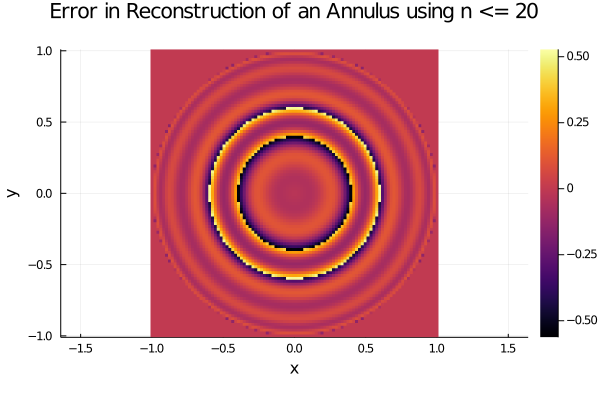

In [187]:
using Plots
diff = sample_across_unit_disk(ann, discretization)[3] -  reshape(reconstruction, (discretization, discretization))
plot(heatmap(xx, yy, diff), aspectratio = true, xlabel="x", ylabel="y", title="Error in Reconstruction of an Annulus using n <= 20")

In [155]:
# It looks like I just need more coefficients than I thought - which would have made sense for the least squares method,
# but the sims ALSO turned out okay...

In [163]:
1/π

0.3183098861837907